# <p style="background-color: #f5df18; padding: 10px;"> Foundations of Astronomical Data Science | **Photometry** </p>

<div style="display: flex;">
    <div style="flex: 1; margin-right: 100px;">
        <h2>Questions</h2>
        <ul>
            <li>How do we use Matplotlib to define a polygon and select points that fall inside it?</li>
        </ul>
    </div>
    <div style="flex: 1;">
        <h2>Learning Objectives</h2>
        <ul>
            <li>Use isochrone data to specify a polygon and determine which points fall inside it.</li>
            <li>Use Matplotlib features to customize the appearance of figures.</li>
        </ul>
    </div>
</div>


In the previous episode we downloaded photometry data from Pan-STARRS,
which is available from the same server we have been using to get Gaia
data.

The next step in the analysis is to select candidate stars based on
the photometry data.
The following figure from the paper is a color-magnitude diagram
showing the stars we previously selected based on proper motion:


<div>
<img src="https://datacarpentry.org/astronomy-python/fig/gd1-3.png" width="800"/>
</div>

In orange is a [theoretical isochrone](https://en.wikipedia.org/wiki/Stellar_isochrone), showing where we expect the stars
in GD-1 to fall based on the metallicity and age of their original
globular cluster.

By selecting stars in the shaded area, we can further distinguish the
main sequence of GD-1 from mostly younger background stars.


# Outline
---

1. We will reload the data from the previous episode and make a
  color-magnitude diagram.

2. We will use an isochrone computed by MIST to specify a polygonal
  region in the color-magnitude diagram and select the stars inside of it.

This imports previously imported functions:

In [1]:
from os.path import getsize

import pandas as pd

from matplotlib import pyplot as plt

from episode_functions import *

The following code loads in the data (instructions for downloading data can be
found in the [setup instructions](../learners/setup.md)).  You may need to add a the path
to the filename variable below (e.g. `filename = 'student_download/backup-data/gd1_data.hdf'`)

In [2]:
filename = 'gd1_data.hdf'
candidate_df = pd.read_hdf(filename, 'candidate_df')

# Plotting photometry data
---

Now that we have photometry data from Pan-STARRS, we can produce a
[color-magnitude
diagram](https://coolwiki.ipac.caltech.edu/index.php/Color-Magnitude_and_Color-Color_plots_Overview)
to replicate the diagram from the original paper:

<div>
<img src="https://datacarpentry.org/astronomy-python/fig/gd1-3.png" width="800"/>
</div>

The y-axis shows the apparent magnitude of each source with the [g
filter](https://en.wikipedia.org/wiki/Photometric_system).

The x-axis shows the difference in apparent magnitude between the g
and i filters, which indicates color.

## The color magnitude diagram of GD-1 and foreground stars

As a pathologist can easily point to tumor on a biopsy slide, so too can astronomers who study stellar populations see two stellar main groups of stars in this color magnitude diagram, one from an old star cluster (presumably, GD-1), and the other, stars much closer, but at every distance between the Earth and the cluster ("foreground"). The color magnitude diagram is a technique developed to separate these features out just as pathologists have techniques to contrast human tissue.
The color of a star is primarily related to the star's surface temperature, with bluer stars indicating higher temperatures and redder stars indicating lower temperatures. This logic is not too far off from the color at the bottom of a match flame compared to the top.


Foreground Stars:
To know the temperature of a star, you first need to know its distance and to account for the dust between us and the star. You can guess the effect of distance. A star farther away will be fainter (lower y-axis value) than the same star closer (think of car headlights as they approach). Dust will remove light from the star's path to our telescopes, which makes the star seem like it has less energy than it otherwise would have, which makes it do two things on this diagram: 1) look fainter (lower on the y-axis; larger magnitude value) and 2) look cooler (higher x-axis value). The stars spread throughout the diagram are all stars bright enough to be detected in our Milky Way between GD-1 and us but made fainter and redder (spread to the lower-right) by their spread in distance from us and the amount dust in the line of sight.


GD-1:
The pile up of stars in the lower-left quadrant of this diagram are interesting because it suggests something is at the same distance with the same amount of dust in the way. When we use our knowledge of theoretical astrophysics (independently calculated outside this work) to estimate how bright a population of old stars would be if it were at the distance of GD-1, we get that solid red line. The exact values of age and metallicity ([Fe/H] value) is a variable needed to reproduce the theoretical isochrone, but frankly, the choice could vary a lot and still would fit the data well.

[More on color-magnitude diagrams and their theoretical counterpart, here.](https://spiff.rit.edu/classes/ladder/lectures/ordinary_stars/ordinary.html)


With the photometry we downloaded from the PanSTARRS table into
`candidate_df` we can now recreate this plot.

Text(0.5, 0, 'Color (g-i)')

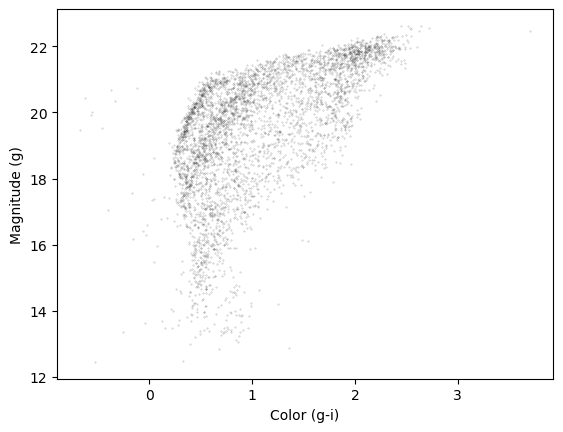

In [3]:
### Recreate color-magnitude diagram ### 


x = candidate_df['g_mean_psf_mag'] - candidate_df['i_mean_psf_mag']
y = candidate_df['g_mean_psf_mag']
plt.plot(x, y, 'ko', markersize=0.3, alpha=0.3)

plt.ylabel('Magnitude (g)')
plt.xlabel('Color (g-i)')



We have assigned the color and magnitude to variables `x` and `y`, respectively.  
We have done this out of convenience and to keep the code readable since the
table variables and column names are long and `x` includes an operation
between two columns.

We can zoom in on the region of interest by setting the range of
x and y values displayed with the `xlim` and `ylim` functions.
If we put the higher value first in the `ylim` call, this will invert
the y-axis, putting fainter magnitudes at the bottom.

(22.0, 14.0)

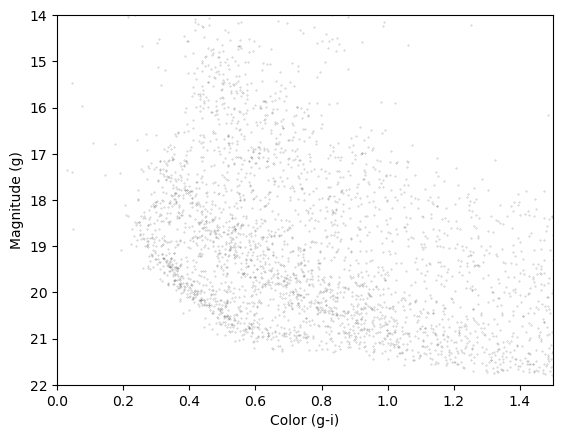

In [4]:
### Zoom in on the region of interest ###

x = candidate_df['g_mean_psf_mag'] - candidate_df['i_mean_psf_mag']
y = candidate_df['g_mean_psf_mag']
plt.plot(x, y, 'ko', markersize=0.3, alpha=0.3)

plt.ylabel('Magnitude (g)')
plt.xlabel('Color (g-i)')

plt.xlim([0, 1.5])
plt.ylim([22, 14])



Our figure does not look exactly like the one in the paper because we
are working with a smaller region of the sky, so we have fewer
stars.  But the main sequence of GD-1 appears as an overdense region in the lower left.

We want to be able to make this plot again, with any selection of PanSTARRs photometry,
so this is a natural time to put it into a function that accepts as input
an Astropy `Table` or Pandas `DataFrame`, as long as
it has columns named `g_mean_psf_mag` and `i_mean_psf_mag`. To do this we will change
our variable name from `candidate_df` to the more generic `dataframe`.

In [5]:
### Define function "plot_cmd" to assist in recreating figure ####

def plot_cmd(dataframe):
    """Plot a color magnitude diagram.
    
    dataframe: DataFrame or Table with photometry data
    """
    y = dataframe['g_mean_psf_mag']
    x = dataframe['g_mean_psf_mag'] - dataframe['i_mean_psf_mag']

    plt.plot(x, y, 'ko', markersize=0.3, alpha=0.3)

    plt.xlim([0, 1.5])
    plt.ylim([22, 14])

    plt.ylabel('Magnitude (g)')
    plt.xlabel('Color (g-i)')


Here are the results:

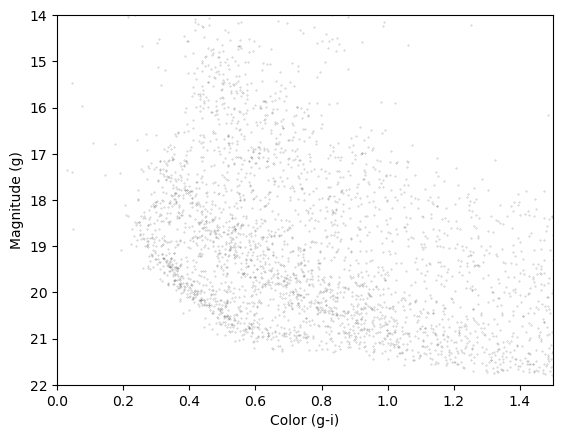

In [6]:
plot_cmd(candidate_df)

In the next section we will use an isochrone to specify a polygon that contains this overdense region.

# Isochrone
---

Given our understanding of the age, metallicity, and distance to GD-1 we can overlay a
theoretical isochrone for GD-1 from the MESA Isochrones and Stellar Tracks and better identify the main sequence of GD-1.

## 🔔 Calculating Isochrone
---

In fact, we can use [MESA Isochrones \& Stellar Tracks](https://waps.cfa.harvard.edu/MIST/) (MIST)
to compute it for us.
Using the [MIST Version 1.2 web interface](https://waps.cfa.harvard.edu/MIST/interp_isos.html),
we computed an isochrone with the following parameters:

- Rotation initial v/v\_crit = 0.4
- Single age, linear scale = 12e9
- Composition [Fe/H] = -1.35
- Synthetic Photometry, PanStarrs
- Extinction av = 0

# Making a polygon
---

The MIST isochrone files available on the website above can not be directly plotted over our data.
We have selected the relevant part of the isochrone, the filters we are interested in, and scaled the photometry to the distance of GD-1
([details here](https://datacarpentry.org/astronomy-python/instructor/calculating_MIST_isochrone.html)).
Now we can read in the results which you downloaded as part of the [setup instructions](https://datacarpentry.org/astronomy-python/instructor/index.html#setup):

In [8]:
### Read in 'gd1_isochrone.hdf5' ### 

filename = 'gd1_isochrone.hdf5'
iso_df = pd.read_hdf(filename, 'iso_df')
iso_df.head()

,mag_g,color_g_i
0,28.294743,2.195021
1,28.189718,2.166076
2,28.051761,2.129312
3,27.916194,2.093721
4,27.780024,2.058585


Here is what the isochrone looks like on the color-magnitude diagram.

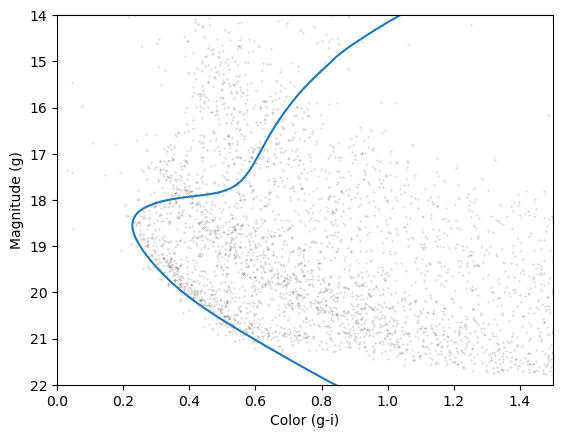

In [10]:
### Overplot isochrone on the color-magnitude diagram ###

plot_cmd(candidate_df)
plt.plot(iso_df['color_g_i'], iso_df['mag_g']);






In the bottom half of the figure, the isochrone passes through the
overdense region where the stars are likely to belong to GD-1.

Although some stars near the top half of the isochrone likely belong to GD-1,
these represent stars that have evolved off the main sequence. The density of GD-1 stars in this region is therefore
much less and the contamination with other stars much greater. So to get the purest sample of GD-1 stars we will select only stars on the main sequence.

So we will select the part of the isochrone that lies in the overdense region.

`g_mask` is a Boolean Series that is `True` where `g` is between 18.0 and 21.5.

In [11]:
g_all = iso_df['mag_g']

g_mask = (g_all > 18.0) & (g_all < 21.5)
g_mask.sum()

117

We can use it to select the corresponding rows in `iso_df`:

In [12]:
iso_masked = iso_df[g_mask]
iso_masked.head()

,mag_g,color_g_i
94,21.411746,0.692171
95,21.322466,0.670238
96,21.233380,0.648449
97,21.144427,0.626924
98,21.054549,0.605461


Now, to select the stars in the overdense region, we have to define a
polygon that includes stars near the isochrone.

In [13]:
g = iso_masked['mag_g']
left_color = iso_masked['color_g_i'] - 0.06
right_color = iso_masked['color_g_i'] + 0.12

Here is our plot with these boundaries:

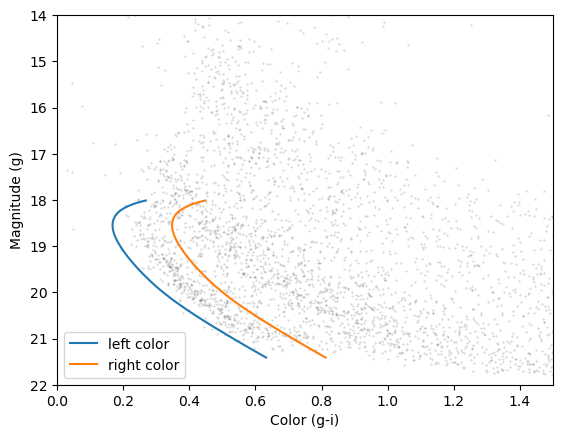

In [14]:
### add boundaries to the cmd ###


plot_cmd(candidate_df)

plt.plot(left_color, g, label='left color')
plt.plot(right_color, g, label='right color')

plt.legend();



# Which points are in the polygon?
---

Matplotlib provides a `Polygon` object that we can use to check which
points fall in the polygon we just constructed.

To make a `Polygon`, we need to assemble `g`, `left_color`, and
`right_color` into a loop, so the points in `left_color` are connected
to the points of `right_color` in reverse order.

We will use a "slice index" to reverse the elements of `right_color`.
As explained in the [NumPy
documentation](https://numpy.org/doc/stable/reference/arrays.indexing.html),
a slice index has three parts separated by colons:

- `start`: The index of the element where the slice starts.

- `stop`: The index of the element where the slice ends.

- `step`: The step size between elements.

In [16]:
reverse_right_color = right_color[::-1]

In this example, `start` and `stop` are omitted, which means all
elements are selected.

And `step` is `-1`, which means the elements are in reverse order.

To combine the `left_color` and `right_color` arrays we will use the NumPy `append` function
which takes two arrays as input, and outputs them combined into a single array.


In [17]:
### Use the NumPy append function to create a single array ###


import numpy as np
color_loop = np.append(left_color, reverse_right_color)
color_loop.shape


(234,)

We can repeat combine these two lines of code into a single line to create a corresponding loop with the elements of `g` in forward and reverse order.

In [18]:
mag_loop = np.append(g, g[::-1])
mag_loop.shape

(234,)

Here is the loop on our plot:

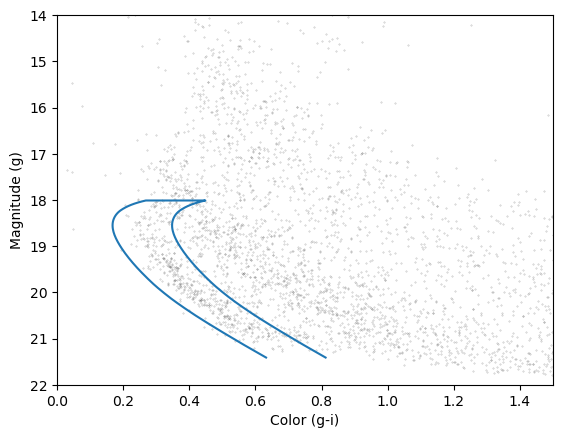

In [19]:
### Add the loop to the cmd ###


plot_cmd(candidate_df)
plt.plot(color_loop, mag_loop);



To make a `Polygon`, it will be useful to put `color_loop` and
`mag_loop` into a `DataFrame`. This is convenient for two reasons - first, `Polygon`
is expecting an Nx2 array and the `DataFrame` provides an easy way for us to pass that
in that is also descriptive for us. Secondly, for reproducibility of our work, we may want
to save the region we use to select stars, and the `DataFrame`, as we have already seen, allows us to save into a variety of formats.

In [20]:
loop_df = pd.DataFrame()
loop_df['color_loop'] = color_loop
loop_df['mag_loop'] = mag_loop
loop_df.head()

,color_loop,mag_loop
0,0.632171,21.411746
1,0.610238,21.322466
2,0.588449,21.233380
3,0.566924,21.144427
4,0.545461,21.054549


Now we can pass `loop_df` to `Polygon`:

In [21]:
from matplotlib.patches import Polygon

polygon = Polygon(loop_df)
polygon


The result is a `Polygon` object which has a `contains_points` method.
This allows us to pass `polygon.contains_points` a list of points and
for each point it will tell us if the point is contained within the polygon.
A point is a tuple with two elements, x and y.


## <p style="background-color: #f5df18; padding: 10px;"> 🛑 Exercise (5 Minutes) </p>
---

When we encounter a new object, it is good to create a toy example to test
that it does what we think it does. Define a list of two points (represented as two tuples),
one that should be inside the polygon and one that should be outside the polygon. Call
`contains_points` on the polygon we just created, passing it the list of points you
defined, to verify that the results are as expected.

## Solution

```python
test_points = [(0.4, 20), 
           (0.4, 16)]
```

```python
test_inside_mask = polygon.contains_points(test_points)
test_inside_mask
```

```output
array([ True, False])
```

The result is an array of Boolean values, and is as expected.




We are almost ready to select stars whose photometry data falls in
this polygon.  But first we need to do some data cleaning.


# Save the polygon
---

[Reproducibile
research](https://en.wikipedia.org/wiki/Reproducibility#Reproducible_research)
is "the idea that ... the full computational environment used to
produce the results in the paper such as the code, data, etc. can be
used to reproduce the results and create new work based on the
research."

This lesson is an example of reproducible research because
it contains all of the code needed to reproduce the results, including
the database queries that download the data and the analysis.

In this episode, we used an isochrone to derive a polygon, which we used
to select stars based on photometry.
So it is important to record the polygon as part of the data analysis pipeline.

Here is how we can save it in an HDF5 file.

In [22]:
### Save loop to HDF5 file ###

filename = 'gd1_data.hdf'
loop_df.to_hdf(filename, 'loop_df')



/var/folders/b3/gxd2jb0s4bq1wknd7l1bnpg80000gn/T/ipykernel_16052/3204237154.py:4: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  loop_df.to_hdf(filename, 'loop_df')


# Selecting based on photometry
---

Now we will check how many of the candidate stars are inside the polygon we chose.
`contains_points` expects a list of (x,y) pairs. As with creating the `Polygon`, `DataFrames` are
a convenient way to pass the colors and magnitudes for all of our stars in `candidates_df` to our `Polygon` to see
which candidates are inside the polygon. We will start by putting color and magnitude data from `candidate_df` into a new `DataFrame`.

In [23]:
cmd_df = pd.DataFrame()

cmd_df['color'] = candidate_df['g_mean_psf_mag'] - candidate_df['i_mean_psf_mag']
cmd_df['mag'] = candidate_df['g_mean_psf_mag']

cmd_df.head()

,color,mag
0,0.380400,17.8978
1,1.609200,19.2873
2,1.485300,16.1516
3,0.686701,18.6709
4,0.384899,16.5224


Which we can pass to `contains_points`:

In [24]:
inside_mask = polygon.contains_points(cmd_df)
inside_mask

array([False, False, False, ..., False, False, False])

The result is a Boolean array.

## <p style="background-color: #f5df18; padding: 10px;"> 🛑 Exercise (5 Minutes) </p>
---

Boolean values are stored as 0s and 1s. `FALSE` = 0 and `TRUE` = 1. Use this information
to determine the number of stars that fall inside the polygon.

## Solution

```python
inside_mask.sum()
```

```output
486
```

Now we can use `inside_mask` as a mask to select stars that fall inside the polygon.

In [25]:
winner_df = candidate_df[inside_mask]

We will make a color-magnitude plot one more time, highlighting the selected stars with green markers.

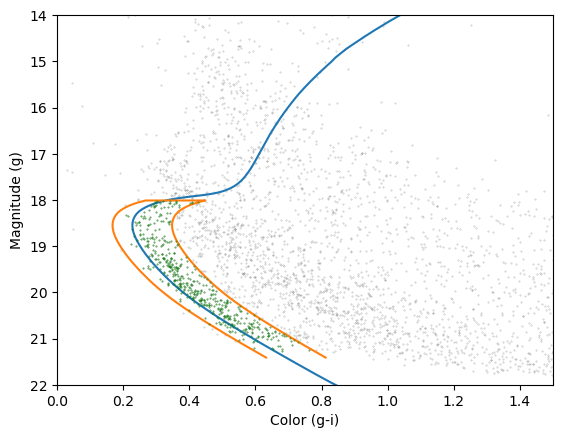

In [26]:
plot_cmd(candidate_df)
plt.plot(iso_df['color_g_i'], iso_df['mag_g'])
plt.plot(color_loop, mag_loop)

x = winner_df['g_mean_psf_mag'] - winner_df['i_mean_psf_mag']
y = winner_df['g_mean_psf_mag']
plt.plot(x, y, 'go', markersize=0.5, alpha=0.5);

The selected stars are, in fact, inside the polygon,
which means they have photometry data consistent with GD-1.

Finally, we can plot the coordinates of the selected stars:

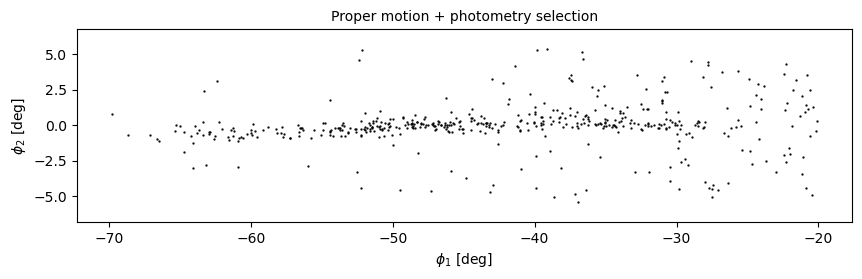

In [27]:
fig = plt.figure(figsize=(10,2.5))

x = winner_df['phi1']
y = winner_df['phi2']
plt.plot(x, y, 'ko', markersize=0.7, alpha=0.9)

plt.xlabel('$\phi_1$ [deg]')
plt.ylabel('$\phi_2$ [deg]')
plt.title('Proper motion + photometry selection', fontsize='medium')

plt.axis('equal');

This example includes the new Matplotlib command `figure`, which creates the larger canvas that the subplots are placed on.  In previous examples, we didn't have
to use this function; the figure was created automatically.  But when
we call it explicitly, we can provide arguments like `figsize`, which
sets the size of the figure. It also returns a figure object which we will
use to further customize our plotting in the next episode.

In the example above we also used TeX markup in our axis labels so that they render as the
Greek letter `$\phi$` with subscripts for `1` and `2`.
Matplotlib also allows us to write basic TeX markup by wrapping the text we want
rendered as TeX with `$` and then using TeX commands inside. This basic rendering
is performed with [mathtext](https://matplotlib.org/stable/tutorials/text/mathtext.html);
more advanced rendering with LaTex can be done with the `usetex` option in `rcParams`
which we will discuss in Episode 7.

In the next episode we are going to make this plot several more times, so it makes sense to
make a function. As we have done with previous functions we can copy and paste what we just wrote,
replacing the specific variable `winner_df` with the more generic `df`.

In [29]:
def plot_cmd_selection(df):
    x = df['phi1']
    y = df['phi2']

    plt.plot(x, y, 'ko', markersize=0.7, alpha=0.9)

    plt.xlabel('$\phi_1$ [deg]')
    plt.ylabel('$\phi_2$ [deg]')
    plt.title('Proper motion + photometry selection', fontsize='medium')

    plt.axis('equal')

And here is how we use the function.

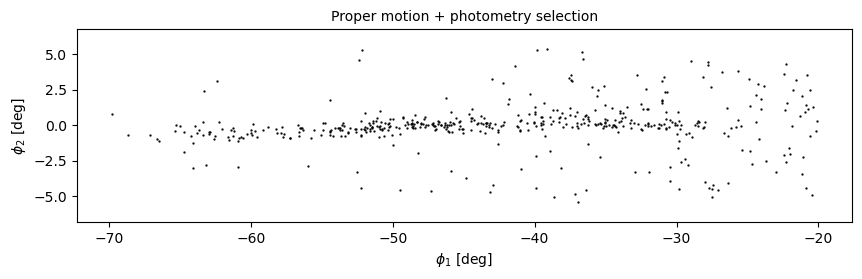

In [30]:
fig = plt.figure(figsize=(10,2.5))
plot_cmd_selection(winner_df)

# 💾 Write the data
---

Finally, we will write the selected stars to a file.


In [31]:
### save winner_df as an hdf ###

filename = 'gd1_data.hdf'
winner_df.to_hdf(filename, 'winner_df')

MB = 1024 * 1024
getsize(filename) / MB


/var/folders/b3/gxd2jb0s4bq1wknd7l1bnpg80000gn/T/ipykernel_16052/350044217.py:4: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  winner_df.to_hdf(filename, 'winner_df')


15.492050170898438

# Summary
---

In this episode, we used photometry data from Pan-STARRS to draw a
color-magnitude diagram.
We used an isochrone to define a polygon and select stars we think are
likely to be in GD-1.  Plotting the results, we have a clearer picture
of GD-1, similar to Figure 1 in the original paper.

# <p style="background-color: #f5df18; padding: 10px;"> 🗝️ Key points</p>
---

- Matplotlib provides operations for working with points, polygons, and other geometric entities, so it is not just for making figures.
- Use Matplotlib options to control the size and aspect ratio of figures to make them easier to interpret.
- Record every element of the data analysis pipeline that would be needed to replicate the results.
